# RAPPORT
## Micro-simulation des politiques fiscales
## Passage de la PPE et du RSA activité à la Prime d'Activité
### Stéphane Benveniste et Morgan Raux

### Plan du rapport


Introduction

I. Les fonctions de notre code

A. Fonction pour le travail à temps partiel

B. Fonction pour le travail à temps plein

C. Fonctions pour le calcul, l'affichage et la réalisation de graphiques sur les aides socio-fiscales

II. Les différents cas types

A. Célibataires : effet de seuil de l'âge et temps partiel contre temps plein

A.1. Adulte célibataire d'au moins 25 ans au SMIC horaire de l'absence de temps de travail au temps plein

A.2. Adulte célibataire d'au moins 25 ans entre 1 et 2 SMIC temps plein

A.3. Adulte célibataire de 18 à 24 ans entre 1 et 2 SMIC temps plein

B. Union légale, concubinage et différents scenarii de revenus

B.1. Couple en concubinage sans enfant dont l’un des deux gagne le SMIC horaire et l'autre gagne le SMIC temps plein

B.2. Couple légalement uni sans enfant dont l’un des deux à temps partiel gagne le SMIC horaire et l'autre gagne le SMIC temps plein

B.3. Couple légalement uni sans enfant dont l’un des deux gagne entre 1 et 2 SMIC et l'autre n'a pas de revenu

C. L'effet des enfants à charge

C.1. Parent isolé avec un unique enfant

C.2. Couple avec 1 enfant à charge dont les deux parents gagne entre 1 et 2 SMIC et l'autre n'a pas de revenu

C.3. Couple avec 2 enfants à charge dont les deux parents gagne entre 1 et 2 SMIC et l'autre n'a pas de reven

Conclusion

# Introduction :

Le rapport Sirugue, présenté au Premier ministre en juillet 2013, pointe les faiblesses structurelles des deux dispositifs alors chargés du soutien financier aux revenus d’activité des travailleurs modestes que sont le revenu de solidarité active (RSA) et la prime pour l’emploi (PPE).

Pour en améliorer l’efficacité, la prime d’activité (PPA) remplace à partir de janvier 2016 le crédit d’impôt ou impôt négatif (PPE) ainsi que le complément de revenu (RSA). Les conditions et procédures d’éligibilité sont modifiées : elles sont davantage inspirées du RSA mais reprenent quelques caractéristiques de la PPE.

Quand le versement de la PPE était automatique et son calcul se faisait au niveau du foyer fiscal, le recours à la prime d’activité se fait au niveau du ménage au sens de la CAF et doit faire l'objet d'une demande, à l'instar du RSA. Les bénéficiaires du RSA en 2015 n'ont pas besoin de faire cette demande. Toutefois, la Loi de finance initiale prévoit un taux de recours de 50% seulement. C'est pourquoi un premier élément sur lequel portera notre attention sera le niveau de la PPE dans ces mécanismes de complément de revenu puisque c'est le seul dispositif automatique. Un second élément sur lequel sera portée notre attention est la composition du foyer qui est l'un des principaux enjeux de cette étude : la situation conjugale, la présence ou non d’enfants, l’isolement du parent, etc. Même si pour un certain nombre d'éléments, le calquage de la prime d'activité sur le RSA activité rend la situation peu ou prou identique, certains ont leur importance et ils sont autant d'éléments à prendre en considération afin d’identifier l’impact éventuel de la réforme. Enfin, nous aborderons évidemment l’un des points essentiels de la réforme : l'abaissement de l’âge d’éligibilité au RSA qui était de 25 ans à 18 ans pour la prime d'activité.

L'ensemble de ces observations nous a amené à utiliser 9 cas-types regroupés en trois sections. La première (A.) s'intéresse aux célibataires et permet ainsi d'étudier l'effet de l'ouverture de la prime d'activité dès 18 ans (comparaison des cas A.2. et A.3.). Nous nous intéressons aussi au cas particulier du temps partiel pour lequel nous nous attendons à différents effets assez particuliers du fait des modalités particulières d'éligibilité et de calcul des dispositifs (comparaison des cas A.1. et A.2.). La seconde section (B.) s'intéresse notamment à l'effet du statut légal du couple sur les aides socio-fiscales en partant du principe que les membres des couples en concubinage (B.1.) voient leur éligibilité à la PPE étudiée séparément quand la situation des couples mariés (B.2.) n'est étudiée qu'en tant que foyer fiscal unique. Nous utilisons du temps partiel puisque c'est pour de faibles revenus que la PPE peut être la plus importante pour les foyers ne bénéficiant pas du RSA. Puisque notre modélisation du temps partiel présente quelques problèmes, nous développons un troisième cas (B.3.) avec du temps plein. La troisième section (C.) présente moins d'intérêt pour l'analyse de la réforme mais nous souhaitions tout de même vérifier le calquage du calcul de la prime d'activité sur le RSA activité et observer ainsi l'absence d'impact pour différentes situations familiales, soit un parent isolé avec un enfant (C.1.), un couple avec un (C.2.) et deux (C.3.) enfants à charge.

L’objectif de notre étude est d’identifier les gagnants et les perdants de cette réforme. Pour ce faire, nous simulons les cas-types présentés précédemment au moyen d'openfisca, moteur ouvert de micro-simulation du système socio-fiscal français.

Dans une première grande partie (I.), nous rédigeons l'essentiel du code grâce à un certain nombre de fonctions pour le temps partiel (A.), le temps plein (B.), ainsi que le calcul, l'affichage et la réalisation de graphiques (C.). Dans une seconde grande partie (II.), nous présentons les résultats de nos cas-types et commentons. Enfin, nous concluons.

#I. Les fonctions de notre code

In [1]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français
import openfisca_core   
import numpy
from openfisca_core import periods

from __future__ import division

get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français

In [2]:
scenario = tax_benefit_system.new_scenario()

In [3]:
simulation = tax_benefit_system.new_scenario().init_single_entity(parent1 = dict(), period = 2014).new_simulation()
from openfisca_core import periods

smic_by_year = dict()
for year in range(2005, 2017):
   instant = periods.period(year).start
   smic_by_year[year] = simulation.legislation_at(instant).cotsoc.gen.smic_h_b

##A. Fonction pour le travail à temps partiel

Nous définissons ci-dessous une fonction qui permettra de décliner les différentes situations familiales (nombre d'adulte, statut conjugal, nombre d'enfants) ainsi que les différentes situations de revenus avec du travail à temps partiel (salaire horaire, nombre d'heures travaillées, salaire du deuxième parent calé sur celui du premier ou fixé à zéro ou au SMIC temps plein).

In [4]:
year = 2014
count1 = 1650
temps_plein = 1650
def create_scenario(nb_adultes = 1, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0 , union_legale = 1, indexer = 0, test = 0, tps_travail = 0):
    enfants_base_list = [dict(birth = date(2014 - age, 1, 1)) for age in range(5, 15)]
    scenario_kwargs = dict(
    axes = [[
            dict(
                count = count1,
                min = 0,
                max = temps_plein,
                name = 'ppe_du_sa',
                period = year ,
                ),
            dict(
                count = count1,
                min = 0,
                max = temps_plein,
                name = 'ppe_du_sa',
                period = year+1,
                ),
            dict(
                count = count1,
                min = 0,
                max = temps_plein,
                name = 'heures_remunerees_volume',
                period = year ,
                )  if  tps_travail ==1 else None,
            dict(
                count = count1,
                min = 0,
                max = temps_plein,
                name = 'heures_remunerees_volume',
                period = year+1,
                )   if  tps_travail ==1 else None,    
            dict(
                count = count1,
                min = 0,
                max = temps_plein,
                name = 'heures_remunerees_volume',
                period = year+2,
                )  if  tps_travail ==1 else None,       
            dict(
                count = count1,
                min = 0,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
             dict(
                count = count1,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
              dict(
                count = count1,
                min = 0,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year+1 ,
                ),
            dict(
                count = count1,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year +1,
                ),
             dict(
                count = count1, 
                min = 0,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),
            dict(
                count = count1,
                index = 1 if  indexer ==1 else None,
                min = 0,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),    
                ]],
    period =  '{}:3'.format(year),
    parent1 = dict(
    birth = date(1987, 1, 1) if parent1_25ans == 1 else date(1993, 1, 1),
    statmarit = 1 if union_legale == 1 else 2,
            ),
    parent2 = dict(
    birth = date(1987, 1, 1)if parent2_25ans == 1 else date(1993, 1, 1),
    salaire_de_base = smic_by_year[year] * temps_plein *3  if test == 1 else None,
    statmarit = 1 if union_legale == 1 else 2,
            ) if nb_adultes == 2 else None,
    enfants = enfants_base_list[:nb_enfants],
    #contrat_de_travail = 0 if tps_travail == 0 else 1,
        )
    scenario = tax_benefit_system.new_scenario().init_single_entity(**scenario_kwargs)
    return scenario

In [5]:
print scenario

                    * EXPLICATIONS SUR LA FONCTION * 
**********************


    nb_adultes :      Déclarer 1 un 2 adultes. Par défaut (si ce n'est pas renseigné), il y a un adulte

    parent1_25ans :   1 >=25 ans  2 <25 ans. En indiquant 1, le parent 1 a au moins 25 ans, en indiquant 2, il a moins de 25 ans. Par défaut, l'adulte a plus de 25 ans

    parent2_25ans :   Idem

    coeff_smic :      indiquer le salaire horaire en nombre de SMIC. Par défaut 1 SMIC horaire
    
    nb_enfants :      indiquer le nombre d'enfants. Une amélioration de la fonction pourrait consister en la distinction des enfants de plus de 3 ans de ceux de moins de 3 ans (non modélisés ici et qui ont une influence sur les aides sociales. Toutefois, puisque la présence d'enfants de moins de 3 ans ne constitue dans tous les cas qu'une majoration forfaitaire, nous n'avons pas jugé indispensable de les intégrer.
    
    union_legale      1=mariés ; 2=concubins   (seulement si 2 adultes). Par défaut, mariés.
    
    tps_travail :     devait servir à renseigner sur contrat_de_travail 0 (temps plein, valeur par défaut) ou 1 (temps partiel) mais cela fait buger nos fonctions : TypeError: init_single_entity() got an unexpected keyword argument 'contrat_de_travail'. Cette erreur nous surprend car contrat_de_travail semble pourtant bien exister. Nous avons donc mis un # devant cette mention dans la fonction.
    
    indexer & test     voir ci-dessous
    
Pour avoir les deux salaires qui évoluent ensemble : indexer = 1 & test = 0

Pour avoir le salaire du parent 2 fixé à zéro : indexer = 0 & test = 0  (situation par défaut)

Pour avoir le salaire du parent 2 fixé au smic temps plein : indexer = 0 & test = 1

**********************

## B. Fonction pour le travail à temps plein

Nous définissons un second scenario pour du travail à temps plein avec une variation de la rémunération horaire au moyen de l'argument coeff_smic.

In [6]:
scenario2 = tax_benefit_system.new_scenario()

In [7]:
year = 2014
count2 = 2000
temps_plein = 1650
def create_scenario2(nb_adultes = 1, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 1.00001, nb_enfants = 0 , union_legale = 1, indexer = 0, test = 0):
    enfants_base_list = [dict(birth = date(2014 - age, 1, 1)) for age in range(5, 15)]
    scenario_kwargs = dict(
    axes = [[
            dict(
                count = count2,
                min = temps_plein,
                max = temps_plein*1.00001,
                name = 'ppe_du_sa',
                period = year ,
                ),
            dict(
                count = count2,
                min = temps_plein,
                max = temps_plein*1.00001,
                name = 'ppe_du_sa',
                period = year+1,
                ),
            dict(
                count = count2,
                min = smic_by_year[year] * temps_plein,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
             dict(
                count = count2,
                index = 1 if  indexer ==1 else None,
                min = smic_by_year[year] * temps_plein,
                max = smic_by_year[year] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year ,
                ),
              dict(
                count = count2,
                min = smic_by_year[year +1] * temps_plein,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year+1 ,
                ),
            dict(
                count = count2,
                index = 1 if  indexer ==1 else None,
                min = smic_by_year[year +1] * temps_plein,
                max = smic_by_year[year +1] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year +1,
                ),
             dict(
                count = count2, 
                min = smic_by_year[year + 2] * temps_plein,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),
            dict(
                count = count2,
                index = 1 if  indexer ==1 else None,
                min = smic_by_year[year + 2] * temps_plein,
                max = smic_by_year[year + 2] * temps_plein*coeff_smic,
                name = 'salaire_de_base',
                period = year + 2,
                ),    
                ]],
    period =  '{}:3'.format(year),
    parent1 = dict(
    birth = date(1987, 1, 1) if parent1_25ans == 1 else date(1993, 1, 1),
    statmarit = 1 if union_legale == 1 else 2,
            ),
    parent2 = dict(
    birth = date(1987, 1, 1)if parent2_25ans == 1 else date(1993, 1, 1),
    salaire_de_base = smic_by_year[year] * temps_plein *3  if test == 1 else None,
    statmarit = 1 if union_legale == 1 else 2,
            ) if nb_adultes == 2 else None,
    enfants = enfants_base_list[:nb_enfants],
        )
    scenario2 = tax_benefit_system.new_scenario().init_single_entity(**scenario_kwargs)
    return scenario2

In [8]:
print scenario2

                    * EXPLICATIONS SUR LA FONCTION * 
**********************

Choix du count2 = 2000

Puisqu'on indiquera souvent 2 SMIC, 1000 aurait permis de lire plus simplement le multiple du SMIC en abscisse, e.g. 500 = 1,5 SMIC. Toutefois l'impression (print) des variables est alors exhaustives ce qui complique fortement la lecture du rapport. Nous choisissons donc 2000 puisque le calcul demeure simple et que les variables sont alors parcellement publiées. Pour un coeff_smic de 2, une variation de 200 en abscisse vaut pour une variation de 0,1 SMIC.


Bien que nous fixions souvent coeff_smic à 2, il prend par défaut la valeur 1.00001 afin de permettre systématiquement à l'axe de fonctionner en évitant une même valeur pour min et max. 

**********************

##C. Fonctions pour le calcul, l'affichage et la réalisation de graphiques sur les aides socio-fiscales

Nous définissons ci-dessous une fonction qui permettra, en fonction du scenario défini, de définir nos variables de salaire, RSA, PPE et prime d'activité, ainsi que le calcul de la somme de l'ensemble des aides pour différentes années (nous comparons 2015 et 2016). La fonction permet aussi de produire un échantillon des résultats et de les représenter sous forme de graphique.

In [9]:
def mes_aides(scenario) :
    salaire_year1 = simulation.calculate_add('salaire_de_base', period=year)
    salaire_year2 = simulation.calculate_add('salaire_de_base', period=year+1)
    salaire_year3 = simulation.calculate_add('salaire_de_base', period=year+2)
    
    rsa_year1 = simulation.calculate_add('rsa', period=year)
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    
    ppe_year1 = simulation.calculate_add('ppe',year)
    ppe_year2 = simulation.calculate_add('ppe',year+1)
    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    
    total_aides_year1 = rsa_year1 + ppe_year1
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3 
    
    print 'ordre des variables'
    print '1/salaire_year2', '2/salaire_year3', '3/rsa_year2', '4/rsa_year3', '5/ppe_year2', '6/ppa_year3', '7/total_aides_year2', '8/total_aides_year3'
     
    print salaire_year2 
    print salaire_year3
    print rsa_year2
    print rsa_year3
    print ppe_year2 
    print ppa_year3
    print total_aides_year2
    print total_aides_year3

    Figure1 = plt.figure()
    plt.plot(rsa_year2, label = "RSA 2015")
    plt.plot(rsa_year3, label = "RSA 2016")
    plt.plot(ppe_year2, label = "PPE 2015")
    plt.plot(ppa_year3, label = "PPA 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    Figure2 = plt.figure()
    plt.plot(total_aides_year2, label = "total aides 2015")
    plt.plot(total_aides_year3, label = "total aides 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

La fonction ci-dessous est calquée sur la précédente mais elle ne fait que représenter les graphiques pour une vision synthétique.

In [10]:
def mes_aides_short(scenario) :
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    ppe_year2 = simulation.calculate_add('ppe',year+1)    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3 
    Figure1 = plt.figure()
    plt.plot(rsa_year2, label = "RSA 2015")
    plt.plot(rsa_year3, label = "RSA 2016")
    plt.plot(ppe_year2, label = "PPE 2015")
    plt.plot(ppa_year3, label = "PPA 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    Figure2 = plt.figure()
    plt.plot(total_aides_year2, label = "total aides 2015")
    plt.plot(total_aides_year3, label = "total aides 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Ci-dessous la même fonction "mes aides" mais avec entre parenthèse scenario2 pour pouvoir l'appliquer au temps plein avec lequel nous créons un scenario2.

In [11]:
def mes_aides2(scenario2) :
    salaire_year1 = simulation.calculate_add('salaire_de_base', period=year)
    salaire_year2 = simulation.calculate_add('salaire_de_base', period=year+1)
    salaire_year3 = simulation.calculate_add('salaire_de_base', period=year+2)
    
    rsa_year1 = simulation.calculate_add('rsa', period=year)
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    
    ppe_year1 = simulation.calculate_add('ppe',year)
    ppe_year2 = simulation.calculate_add('ppe',year+1)
    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    
    total_aides_year1 = rsa_year1 + ppe_year1
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3 
    
    print 'ordre des variables'
    print '1/salaire_year2', '2/salaire_year3', '3/rsa_year2', '4/rsa_year3', '5/ppe_year2', '6/ppa_year3', '7/total_aides_year2', '8/total_aides_year3'
     
    print salaire_year2 
    print salaire_year3
    print rsa_year2
    print rsa_year3
    print ppe_year2 
    print ppa_year3
    print total_aides_year2
    print total_aides_year3

    Figure1 = plt.figure()
    plt.plot(rsa_year2, label = "RSA 2015")
    plt.plot(rsa_year3, label = "RSA 2016")
    plt.plot(ppe_year2, label = "PPE 2015")
    plt.plot(ppa_year3, label = "PPA 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    Figure2 = plt.figure()
    plt.plot(total_aides_year2, label = "total aides 2015")
    plt.plot(total_aides_year3, label = "total aides 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Là aussi pour mes_aides2, ci-dessous la fonction synthétique, si nécessaire.

In [12]:
def mes_aides2_short(scenario2) :
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    ppe_year2 = simulation.calculate_add('ppe',year+1)    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3 
    Figure1 = plt.figure()
    plt.plot(rsa_year2, label = "RSA 2015")
    plt.plot(rsa_year3, label = "RSA 2016")
    plt.plot(ppe_year2, label = "PPE 2015")
    plt.plot(ppa_year3, label = "PPA 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    Figure2 = plt.figure()
    plt.plot(total_aides_year2, label = "total aides 2015")
    plt.plot(total_aides_year3, label = "total aides 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Ci-dessous deux fonctions (scenario et scenario2) pour le calcul, l'affichage et la réalisation de graphique sur le salaire net afin d'opérer quelques vérifications sur nos résultats et de permettre des correctifs

In [13]:
def salairenet(scenario) :
    salaire_net_year1 = simulation.calculate_add('salaire_net', period=year)
    salaire_net_year2 = simulation.calculate_add('salaire_net', period=year+1)
    salaire_net_year3 = simulation.calculate_add('salaire_net', period=year+2)

    print salaire_net_year1
    print salaire_net_year2 
    print salaire_net_year3


    Figure2 = plt.figure()
    plt.plot(salaire_net_year1, label = "salaire 2014")
    plt.plot(salaire_net_year2, label = "salaire 2015")
    plt.plot(salaire_net_year3, label = "salaire 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
def salairenet2(scenario2) :
    salaire_net_year1 = simulation.calculate_add('salaire_net', period=year)
    salaire_net_year2 = simulation.calculate_add('salaire_net', period=year+1)
    salaire_net_year3 = simulation.calculate_add('salaire_net', period=year+2)

    print salaire_net_year1
    print salaire_net_year2 
    print salaire_net_year3


    Figure2 = plt.figure()
    plt.plot(salaire_net_year1, label = "salaire 2014")
    plt.plot(salaire_net_year2, label = "salaire 2015")
    plt.plot(salaire_net_year3, label = "salaire 2016")
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Enfin, deux fonctions (scenario et scenario2) pour calculer la part que représente les aides dans le revenu du salarié ou du foyer.

In [15]:
def mes_aides_share(scenario) :
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    ppe_year2 = simulation.calculate_add('ppe',year+1)    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3
    salaire_net_year2 = simulation.calculate_add('salaire_net', period=year+1)
    salaire_net_year3 = simulation.calculate_add('salaire_net', period=year+2)
    revenu_total_year2 = total_aides_year2 + salaire_net_year2
    revenu_total_year3 = total_aides_year3 + salaire_net_year3
    part_aides_year2 = total_aides_year2 / revenu_total_year2
    part_aides_year3 = total_aides_year3/ revenu_total_year3
    
    print 'ordre des variables'
    print '1/Part des aides dans le revenu en 2015', '2/Part des aides dans le revenu en 2016'
    print part_aides_year2
    print part_aides_year3
    
    Figure1 = plt.figure()
    plt.plot(part_aides_year2, label = "Part des aides dans le revenu en 2015")
    plt.plot(part_aides_year3, label = "Part des aides dans le revenu en 2016")
    
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
def mes_aides2_share(scenario2) :
    rsa_year2 = simulation.calculate_add('rsa', period=year+1)
    rsa_year3 = simulation.calculate_add('rsa', period=year+2)
    ppe_year2 = simulation.calculate_add('ppe',year+1)    
    ppa_year3 = simulation.calculate_add('ppa',year+2)
    total_aides_year2 = rsa_year2 + ppe_year2
    total_aides_year3 = rsa_year3 + ppa_year3
    salaire_net_year2 = simulation.calculate_add('salaire_net', period=year+1)
    salaire_net_year3 = simulation.calculate_add('salaire_net', period=year+2)
    revenu_total_year2 = total_aides_year2 + salaire_net_year2
    revenu_total_year3 = total_aides_year3 + salaire_net_year3
    part_aides_year2 = total_aides_year2 / revenu_total_year2
    part_aides_year3 = total_aides_year3/ revenu_total_year3
    
    print 'ordre des variables'
    print '1/Part des aides dans le revenu en 2015', '2/Part des aides dans le revenu en 2016'
    print part_aides_year2
    print part_aides_year3
    
    Figure1 = plt.figure()
    plt.plot(part_aides_year2, label = "Part des aides dans le revenu en 2015")
    plt.plot(part_aides_year3, label = "Part des aides dans le revenu en 2016")
    
    plt.legend(loc = 2, shadow=True, fancybox=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#II. Les différents cas-types

Grâce aux fonctions que nous avons définies, simulons à présent l'ensemble de nos cas-types.

## A. Célibataires : effet de seuil de l'âge et temps partiel contre temps plein

Nous nous intéressons ici à deux phénomènes : le cas particulier du temps partiel (A.1.) pour lequel les aides socio-fiscales sont essentielles en comparaison du temps plein (A.2.), ainsi que l'effet de l'ouverture de la prime d'activité dès 18 ans en comparant les salariés à temps plein de plus de 25 ans (A.2.) et de moins de 25 ans (A.3.).

###A.1. Adulte célibataire d'au moins 25 ans au SMIC horaire entre zéro heure travaillé et un temps plein

Nous étudions les effets de la réforme pour les salariés à temps partiel.

In [17]:
scenario = create_scenario(nb_adultes = 1, parent1_25ans = 1)#, parent2_25ans = 1, coeff_smic = 1, nb_enfants = 0,  union_legale = 1, indexer =1, test =0, tps_travail = 1)

In [18]:
simulation = scenario.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[  0.00000000e+00   9.61582756e+00   1.92316551e+01 ...,   1.58372686e+04
   1.58468838e+04   1.58565000e+04]
[  0.00000000e+00   9.67586422e+00   1.93517284e+01 ...,   1.59361484e+04
   1.59458242e+04   1.59555000e+04]
[ 6207.68017578  7145.12695312  7141.76367188 ...,  1611.0456543
  1607.68481445  1604.32458496]
[ 6289.92041016  8792.328125    8783.41503906 ...,     0.             0.
     0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[    0.             0.             0.         ...,  2474.23120117
  2470.84814453  2467.46386719]
[ 6207.68017578  7145.12695312  7141.76367188 ...,  1611.0456543
  1607.68481445  1604.32458496]
[ 6289.92041016  8792.328125    8783.41503906 ...,  2474.23120117
  2470.84814453  2467.46386719]


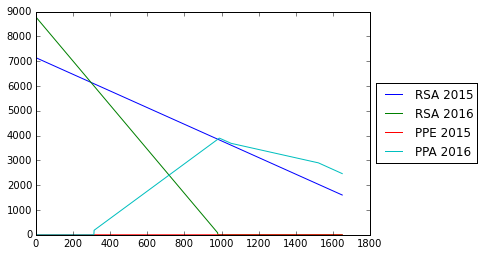

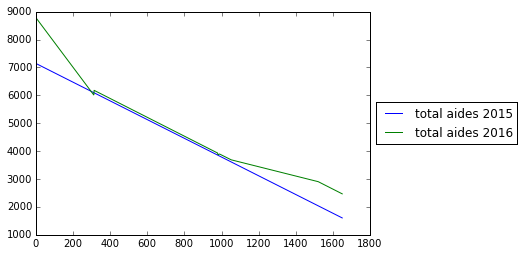

In [19]:
mes_aides(scenario)

Commentaires sur ces premiers graphiques : 

L'abscisse est supposée indiquer le temps de travail, entre 0 et 1650 heures (temps plein). 

Il apparaît un certain nombre de problèmes sur le graphique liés à un salaire net négatif :
- le RSA bondit entre 2015 et 2016 de 7150 à 8800 pour une heure travaillée et les deux courbes de RSA se croise pour environ 300 heures travaillées;
- La PPA ne commence qu'à partir de 300 heures travaillées;

Or, comme nous l'observons sur la publication des variables et le graphique des salaires nets ci-après, le salaire net est bien égal à zéro pour les premières observations mais il est ensuite négatif entre 1 et 300 heures travaillées. Cela est a priori dû à un salaire_de_base faible supposé correspondre à un faible nombre d'heures travaillées, pas forcément bien déclaré. On a essayé de régler ce problème en déclarant heures_remunerees_volume ou bien forfait_heures_remunerees_volume au cas ou. Sans succès. On a aussi essayé d’ajouter à notre fonction l’argument tps_travail qui renseignerait sur contrat_de_travail 0 (temps plein) ou 1 (temps partiel) mais cela fait planter nos fonctions : TypeError: init_single_entity() got an unexpected keyword argument 'contrat_de_travail'. Cette erreur nous surprend car contrat_de_travail semble pourtant bien exister.

Remarquons néanmoins que pour la première observation (i.e.: zéro heure de travail), le montant du RSA augmente uniquement de la revalorisation annuelle, soit de 6208 à 6290. Cela confirme que l'ensemble des problèmes rencontrés proviennent du salaire net négatif et donc de la difficulté à déclarer le temps de travail dans le cadre du temps partiel. C'est pourquoi dans la suite du rapport, nous limitons l'usage du temps partiel.

[     0.          -2428.12744141  -2419.33569336 ...,  12034.06738281
  12042.859375    12051.64355469]
[     0.          -2474.75366211  -2465.88818359 ...,  12108.8515625
  12117.70800781  12126.56445312]
[     0.          -2507.81860352  -2498.89697266 ...,  12166.83789062
  12175.75195312  12184.66992188]


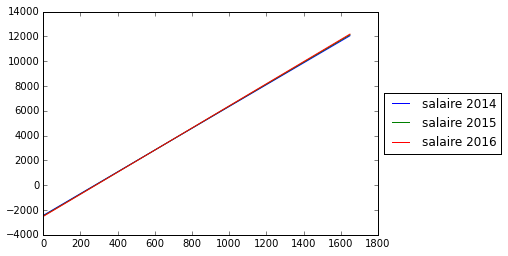

In [20]:
salairenet(scenario)

Commentaires sur le graphique salaire net : 

Bien que le premier point du salaire net soit effectivement à zéro, on observe ensuite un salaire net négatif jusqu'à environ 300 heures travaillées. Le dernier point du salaire net est bien égal au salaire net de chaque année en SMIC temps plein (vérifié sur d'autres scenarii). C'est donc a priori les pentes des courbes qui sont faussées puisque les points de départ sont trop bas mais que les derniers points sont justes. 

Toutefois, en commençant la lecture à partir du point d'abscisse 300 et en transformant artificiellement l'échelle de 300 à 1650 en une échelle de 0 à 1650, on peut comparer avant et après la réforme. Nous retraçons donc ci-dessous uniquement les graphiques et en faisons la lecture en omettant les 300 premiers points d'abscisse et en utilisant la transformation de l'abscisse dans nos commentaires. Les résultats restent à prendre avec réserve.

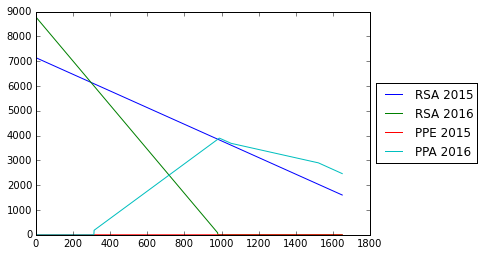

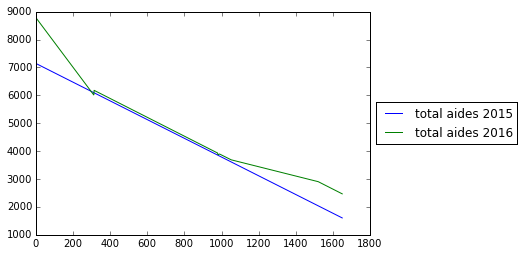

In [21]:
mes_aides_short(scenario)

Commentaires sur les graphiques tronqués (non prise en compte de 0 à 300) :

Observons le second graphique et remarquons ainsi que sur les premières heures travaillées (à patir de 300) les aides de 2016 collent à celles de 2015. En passant au premier graphique, nous remarquons que la montée en puissance progressive de la prime d'activité est exactement compensée par une baisse du RSA plus rapide qu'en 2015 puisque ne demeure plus en 2016 que le mécanisme du RSA socle et n'apparaît plus le RSA activité. La prime d'activité est calibrée sur le RSA activité. A partir de 950 heures travaillées (1080 d'abscisse environ), la PPA se détache progressivement du RSA. Nos anticipations étaient que cela devrait être dû à la compensation de perte de PPE mais nous n'observons pas de PPE.

En effet, alors que l'absence de PPE pourrait surprendre, celle-ci est due au mécanisme de "PPE résiduelle", c'est-à-dire que les revenus du RSA activité en année N sont déduits de la potentielle PPE pour l'année N versée en N+1. Prenons un point particulier, le dernier point où le salarié travaille ainsi à temps plein. D'après notre lecture de la législation, confirmée par nos estimations croisées à partir de plusieurs simulateurs parmi lesquels "prime-pour-emploi.com", le montant de PPE auquel cet individu a droit s'élèverait normalement à 289€ annuels dans la situation où il travaille à temps plein. Mais puisqu'il touche alors plus de 1600 euros de RSA en 2015, il ne se verra pas verser de PPE. A moins de ne pas avoir fait de demande de RSA à la CAF - ce qui concerne 68% des personnes éligibles au RSA activité selon un rapport du comité d'évaluation du RSA. Pour du temps partiel, la PPE apparait à partir d'environ 500 heures travaillées mais là encore le mécanisme de PPE résiduelle l'annule. C'est pourquoi notre scénario OpenFisca ne peut pas ici nous proposer de PPE puisque par défaut il est considéré que l'individu a fait une demande de RSA auprès de la CAF.

Regardons ensuite la part que représentent les aides dans les revenus du salarié. Là encore, il ne faut pas observer avant 300 où la part est supérieure à 1 puisque le salaire net est négatif.

ordre des variables
1/Part des aides dans le revenu en 2015 2/Part des aides dans le revenu en 2016
[ 1.          1.5298835   1.5273639  ...,  0.11742403  0.11713216
  0.11684055]
[ 1.          1.39904761  1.39762747 ...,  0.16899252  0.16869773
  0.16840304]


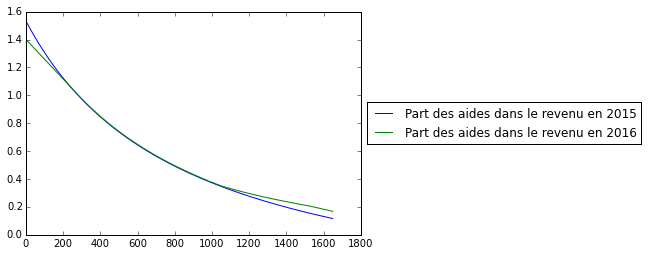

In [22]:
mes_aides_share(scenario)

Commentaires : 

Nous observons que pour un célibataire salarié à temps partiel au SMIC horaire, les aides représentent une part importante de son revenu : entre 100% et 12% du revenu en 2015 selon le temps de travail et entre 100M et 17% du revenu en 2016. 
Evidemment, ces résultats sont à lire avec réserve.

### A.2. Adulte célibataire d'au moins 25 ans entre 1 et 2 SMIC temps plein

Après avoir étudié le cas du temps partiel, procédons à l'étude du temps plein.

In [23]:
scenario2 = create_scenario2(nb_adultes = 1, parent1_25ans = 1, coeff_smic = 2)#, parent2_25ans = 1, nb_enfants = 0,  union_legale = 1, indexer =1, test =0, tps_travail = 1)

In [24]:
simulation = scenario2.new_simulation()

D'emblée, vérifions simplement les salaires nets pour le temps plein puisqu'ils ont posé problème sur le cas précédent avec notre modélisation du temps partiel. Ici, il n'y a aucun problème. On remarque bien l'effet de la revalorisation du SMIC d'année en année, ce qui confirme que notre fonction réussit sur ce point à différencier le salaire horaire en fonction des années. Chacun des salaires nets commence effectivement à 1 SMIC temps plein et progresse pour atteindre son maximum à 2 SMIC temps plein.

[ 12051.64355469  12058.88867188  12066.13378906 ...,  24546.24804688
  24552.38085938  24558.52734375]
[ 12126.56445312  12133.88183594  12141.19042969 ...,  24704.75390625
  24710.92773438  24717.12304688]
[ 12184.66992188  12192.02246094  12199.37695312 ...,  24827.08789062
  24833.32226562  24839.52734375]


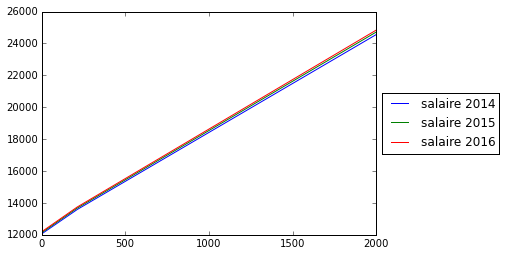

In [25]:
salairenet(scenario2)

Nous pouvons procéder à la simulation des aides avec davantage de confiance.

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5         15864.43261719  15872.36425781 ...,  31697.13476562
  31705.06835938  31713.        ]
[ 15955.5         15963.48144531  15971.46386719 ...,  31895.03710938
  31903.01757812  31911.        ]
[ 1604.32458496  1601.54785156  1598.7746582  ...,     0.             0.
     0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 2467.46386719  2464.67016602  2461.88037109 ...,     0.             0.
     0.        ]
[ 1604.32458496  1601.54785156  1598.7746582  ...,     0.             0.
     0.        ]
[ 2467.46386719  2464.67016602  2461.88037109 ...,     0.             0.
     0.        ]


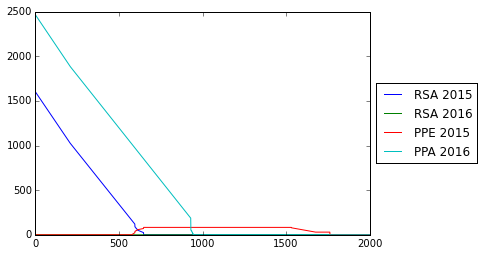

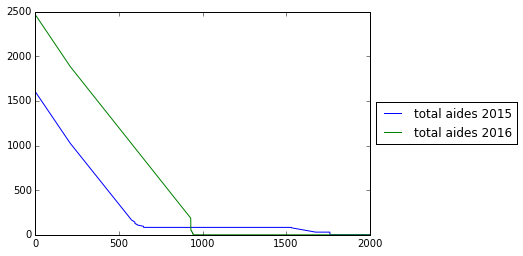

In [26]:
mes_aides2(scenario)

Commentaires:

Ce qui est flagrant à l'observation de nos graphiques est que la prime d'activité de 2016 semble bien plus avantageuse que le RSA de 2015. Pour un SMIC temps plein (tout à gauche du graphique), elle s'élèverait à 2467 euros annuels. Toutefois, d'après la lecture des formules de calcul de la prime d'activité et après vérification en utilisant le simulateur de prime d'activité de la CAF, une personne célibataire qui gagne le SMIC temps plein aurait droit à 132 euros mensuels, soit 1584 euros annuels. Cela serait bien calqué (à quelques euros près du fait de l'approximation de notre estimation) sur les 1604 euros de RSA que nous trouvons pour un SMIC temps plein en 2015. Notre simulation nous propose ici une sur-évaluation de 56% que nous ne savons expliquer.

Autre élément surprenant pour la prime d'activité : nous l'observons ici jusqu'à 1,47 SMIC (calcul Benveniste/Raux sur base de ce qui a été indiqué dans l'usage de l'abscisse). Cependant, toujours d'après notre lecture de la législation et nos estimations, sont éligibles à la prime d'activité les célibataires qui gagnent jusqu'à 1520 euros nets mensuels, soit 1,32 SMIC.  Ainsi, il semblerait que nous sur-évaluions là-aussi quelque peu le plafond de revenus.

Par ailleurs, l'observation successive des graphiques 1 et 2 nous permet de bien identifier le mécanisme de PPE résiduelle. La coexistence simultannée de la PPE et du RSA sur un court échantillon de revenus permet un lissage qui apparaît bien sur le second graphique. Toutefois, là aussi, nous observons que le plafond de revenus pour la PPE est surévalué. Il est ici d'1,9 SMIC contre 1,3 à 1,4 SMIC dans la formule de calcul de la législation.

ordre des variables
1/Part des aides dans le revenu en 2015 2/Part des aides dans le revenu en 2016
[ 0.11684055  0.11659976  0.11635944 ...,  0.          0.          0.        ]
[ 0.16840304  0.16816005  0.1679174  ...,  0.          0.          0.        ]


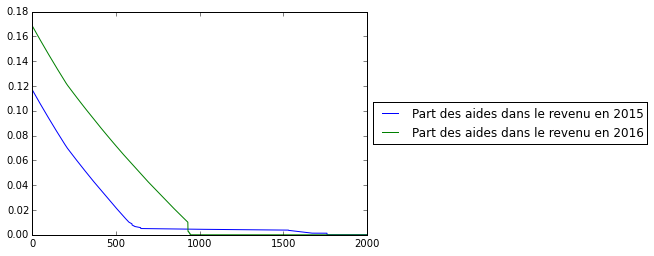

In [27]:
mes_aides2_share(scenario2)

Nous observons comme point de départ les mêmes points que les points d'arrivée du cas précédent. Cela permet au moinsune certaine cohérence mais nous surprend. La part des aides dans le revenu d'un salarié à temps plein n'excède jamais 17%. Les salariés à temps partiel sont donc bien plus dépendants des aides.

Nous observons ici un écart de 4 points entre la part des aides dans le revenu total d'un salarié à temps plein au salaire entre 1 et 1,25 SMIC. A partir d'1,25 SMIC, l'écart commence à se résorber et l'est totalement à 1,46 SMIC.

### A.3. Adulte célibataire de 18 à 24 ans entre 1 et 2 SMIC temps plein

Le cas-type précédent nous a permis de comparer avec le temps partiel, ainsi que de faire quelques premières remarques sur les niveaux d'aides avec du temps plein qui varie entre 1 et 2 SMIC de salaire. Nous nous intéressons à présent aux effets de la réforme pour les jeunes de moins de 25 ans et nous pourrons utiliser le présent cas (A.3.) et le comparer au précédent (A.2.).

In [28]:
scenario2 = create_scenario2(nb_adultes = 1, parent1_25ans = 2, coeff_smic = 2)#, parent2_25ans = 1, nb_enfants = 0,  union_legale = 1, indexer =1, test =0, tps_travail = 1)

In [29]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5         15864.43261719  15872.36425781 ...,  31697.13476562
  31705.06835938  31713.        ]
[ 15955.5         15963.48144531  15971.46386719 ...,  31895.03710938
  31903.01757812  31911.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 737.8380127   736.31518555  734.79406738 ...,    0.            0.            0.        ]
[ 2467.46386719  2464.67016602  2461.88037109 ...,     0.             0.
     0.        ]
[ 737.8380127   736.31518555  734.79406738 ...,    0.            0.            0.        ]
[ 2467.46386719  2464.67016602  2461.88037109 ...,     0.             0.
     0.        ]


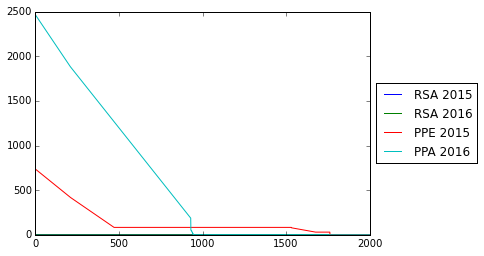

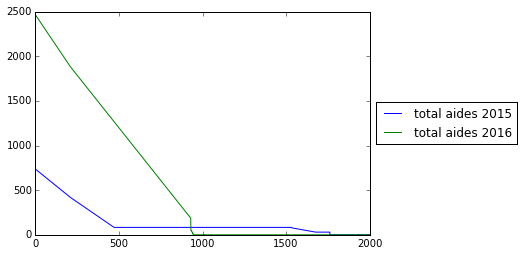

In [30]:
mes_aides2(scenario2)

Commentaires : 

Le jeune célibataire que nous étudions remplit les critères du RSA jeune en toute fin de période : éligibilité s'il a travaillé au moins 3214 heures au cours des trois dernières années. Avec un temps plein à 1650 heures, en 2014 et en 2015, nous arrivons à 3300 heures et notre jeune n'aurait théoriquement droit au RSA que pour les deux dernières semaines de 2015. Toutefois, il n'est pas si surprenant de ne pas observer de RSA pour 2015.

La prime d'activité a exactement le même comportement que pour le cas précédent, ce qui est en phase avec l'ouverture aux moins de 25 ans du dispositif. Il n'y a aucune raison que la prime soit modifiée d'une quelconque manière par le changement d'âge. Ainsi, les remarques précédentes sur le niveau et le plafond sur-évalués sont valables ici aussi. 

Traçons ci-après le graphiques de la part des aides dans le revenu avant et après réforme.

ordre des variables
1/Part des aides dans le revenu en 2015 2/Part des aides dans le revenu en 2016
[ 0.05735502  0.05721087  0.05706702 ...,  0.          0.          0.        ]
[ 0.16840304  0.16816005  0.1679174  ...,  0.          0.          0.        ]


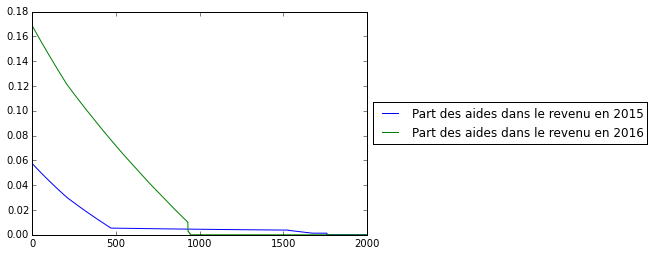

In [31]:
mes_aides2_share(scenario2)

Que ce soit en valeur ou en volume, la réforme est ainsi très profitable aux jeunes de moins de 25 ans. Eligibles au RSA jeune dans des cas très restrictifs, ils n'étaient que 9000 à en bénéficier. Prenons le cas d'un jeune au SMIC temps plein. Il ne recevait qu'en année N+1 une prime pour l'emploi de 738 euros quand le salarié de plus de 25 ans recevait 1600 euros de RSA activité. En 2016, ils auront tous deux droit à la prime d'activité. Bien que la prime d'activité semble sur-évaluée et que le chiffre ne soit pas si robuste, cela correspondrait à un passage de la part des aides dans son revenu de moins de 6% à près de 17%, alors que le plus de 25 ans verrait cette part augmenter de 12% à près de 17%. Les jeunes sont de grands bénéficiaires de la réforme.


## B. Union légale, concubinage et différents scenarii de revenus


Comme précisé en introduction, cette seconde section (B.) s'intéresse tout particulièrement à l'effet du statut légal du couple sur les aides socio-fiscales. Le levier s'opère au niveau de la PPE puisque les membres des couples en concubinage (B.1.) voient leur éligibilité à la PPE étudiée séparément quand la situation des couples mariés (B.2.) n'est étudiée qu'en tant que foyer fiscal unique. Nous utilisons du temps partiel puisque c'est pour de faibles revenus que la PPE peut être la plus importante. Surtout, nous déclarons des adultes de moins de 25 ans. Ceci a pour objectif de faire apparaître de la PPE et ainsi de pouvoir évaluer une éventuelle différence. Comme évoqué précédemment, le non recours au RSA se situe entre 36% pour le RSA socle et 68% pour le RSA activité. Ainsi, ces jeunes de moins de 25 ans représentent à la fois les couples mariés ou concubins de cette tranche d'âge mais aussi les couples plus âgés qui n'ont pas déposé de demande de RSA auprès de leur CAF.

### B.1. Couple en concubinage sans enfant dont l’un des deux gagne le SMIC horaire et l'autre gagne le SMIC temps plein

Pour ce cas-type, l'un des deux salariés gagne le SMIC horaire et travaille entre 0 heure et un temps plein. L'autre membre du couple gagne le SMIC temps plein. Dans ce premier cas, le couple est en concubinage. L'autre membre du couple gagne le SMIC temps plein. L'idée est de comparer B.1. (concubinage) et B.2. (mariage) pour voir l'effet de l'union légale sur la prime pour l'emploi. Nous faisons ici expressement le choix d'utiliser du temps partiel puisque la séparation des foyers fiscaux des concubins est alors supposé avoir un impact encore plus significatif.

In [32]:
scenario = create_scenario(nb_adultes = 2, parent1_25ans = 2, parent2_25ans = 2, union_legale = 2, indexer =0, test =1)# coeff_smic = 1, nb_enfants = 0, tps_travail = 1)

In [33]:
simulation = scenario.new_simulation()

In [34]:
#test de vérification du fonctionnement du statut marital possible pour différentes périodes
simulation.calculate('statmarit', period = 2015)

array([2, 2, 2, ..., 2, 2, 2], dtype=int16)

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]


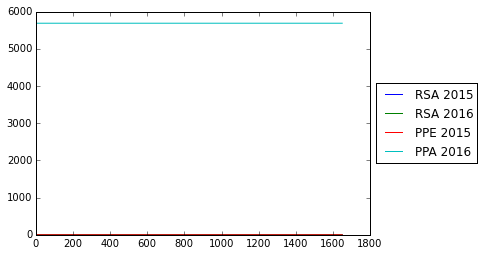

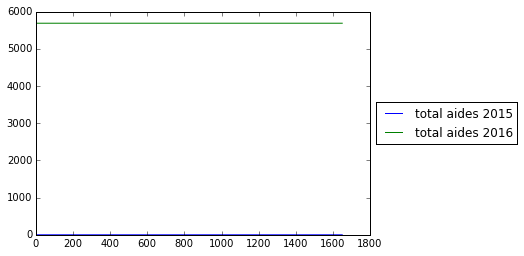

In [35]:
mes_aides(scenario)

Commentaires : 

Alors que le salaire de l'un des deux membres du couple est supposé évoluer avec l'accroissement de son temps de travail, il n'est pas normal que la PPA soit fixe en 2016. En traçant ci-dessous le salaire net, il semble apparaître que le salaire net du parent dont le temps de travail varie est en fait systématiquement fixé à zéro, ce qui est surprenant, d'autant que juste au-dessus, quand on utilise notre fonction mes_aides, on voit du salaire_de_base non nul pour ce parent. Comme on le verra par la suite avec d'autres exemples, il semble qu'openfisca fixe nécessairement l'un des deux parents à zéro. Dès lors, il semble compromis d'étudier l'impact du statut légal du couple.

Par ailleurs, on observe 5787 euros comme première valeur de prime d'activité avec un membre du couple au SMIC et l'autre sans revenu. D'après le simulateur de la CAF, le montant devrait être de 4752 euros mais il est possible que ce soit lié à des problèmes d'entrée de salaires bruts/nets, à l'instar des différences que nous avons observées dans les cas de la section A. Toutefois, l'écart est substantiel et laisse plutôt penser à une nouvelle sur-évaluation.

Par ailleurs, aucune PPE n'apparaît, ce qui nous empêche de lire des résultats pour la comparaison concubinage/union légale. Effectivement, puisque le salaire du membre du couple qui semble utilisé comme référence est nul, il ne touche pas de PPE. D'ailleurs, la question de savoir si le calcul de la PPE aurait renvoyé la somme de la PPE de chacun des membres du couple se pose. 

[     0.          12051.64355469      0.         ...,  12051.64355469
      0.          12051.64355469]
[     0.          12004.94433594      0.         ...,  12004.94433594
      0.          12004.94433594]
[     0.          11971.82324219      0.         ...,  11971.82324219
      0.          11971.82324219]


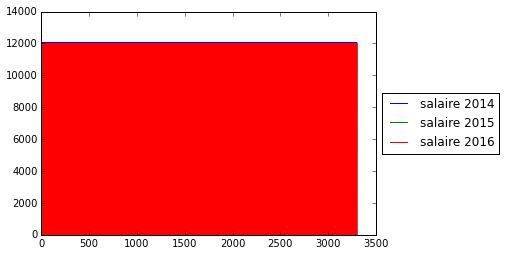

In [36]:
salairenet(scenario)

A titre indicatif, nous calculons aussi ci-dessous le cas-type où l'un des deux membres du couple gagne le SMIC temps plein et où l'autre gagne entre 1 et 2 SMIC pour montrer que le problème n'est pas lié au temps partiel. Nous observons en effet le même problème et surtout, exactement les mêmes résultats. Alors que le salaire du membre du couple dont le salaire varie est supposé être au minimum égal au SMIC temps plein, il est à nouveau fixé à zéro (cf. notre fonction salairenet2 ci-après). Il semble que, quelque soit le montant de salaire, si un salaire est déclaré pour le parent2, celui du parent1 est alors fixé à 0.

In [37]:
scenario2 = create_scenario2(nb_adultes = 2, parent1_25ans = 2, parent2_25ans = 2, union_legale = 2, coeff_smic = 2, indexer =0, test =1)# coeff_smic = 1, nb_enfants = 0, tps_travail = 1)

In [38]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15955.5         15724.5         15963.48144531 ...,  15724.5         31911.
  15724.5       ]
[ 15955.5         15724.5         15963.48144531 ...,  15724.5         31911.
  15724.5       ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]


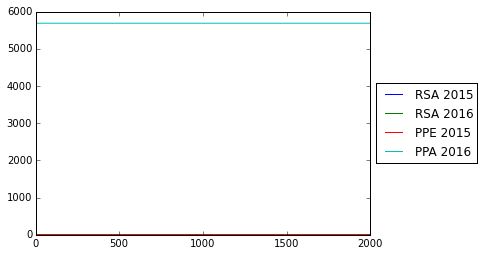

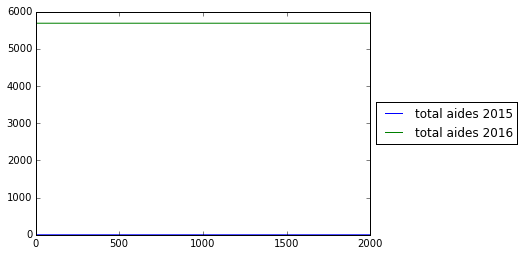

In [39]:
mes_aides2(scenario2)

[     0.          12051.64355469      0.         ...,  12051.64355469
      0.          12051.64355469]
[     0.          12004.94433594      0.         ...,  12004.94433594
      0.          12004.94433594]
[     0.          11971.82324219      0.         ...,  11971.82324219
      0.          11971.82324219]


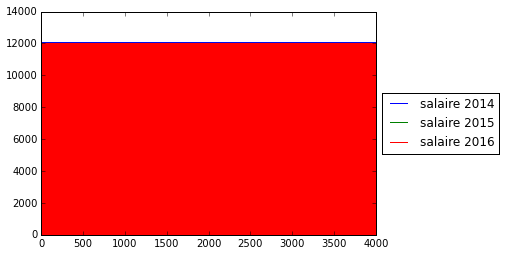

In [40]:
salairenet2(scenario2)

### B.2. Couple légalement uni sans enfant dont l’un des deux à temps partiel gagne le SMIC horaire et l'autre gagne le SMIC temps plein

Comme dans le cas-type précédent, l'un des deux salariés gagne le SMIC horaire et travaille entre 0 heure et un temps plein. Dans ce second cas, le couple est marié. L'autre membre du couple gagne le SMIC temps plein. L'idée était de comparer B.1. (concubinage) et B.2. (mariage) pour voir l'effet de l'union légale sur la prime pour l'emploi.

In [41]:
scenario = create_scenario(nb_adultes = 2, parent1_25ans = 2, parent2_25ans = 2, union_legale = 1, indexer =0, test =1)# coeff_smic = 1, nb_enfants = 0, tps_travail = 1)

In [42]:
simulation = scenario.new_simulation()

In [43]:
#test de vérification du fonctionnement du statut marital possible pour différentes périodes
simulation.calculate('statmarit', period = 2015)

array([1, 1, 1, ..., 1, 1, 1], dtype=int16)

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[  0.00000000e+00   1.57245000e+04   9.67586422e+00 ...,   1.57245000e+04
   1.59555000e+04   1.57245000e+04]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 5687.52832031  5687.52832031  5687.52832031 ...,  5687.52832031
  5687.52832031  5687.52832031]


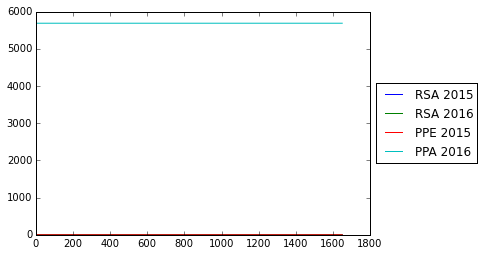

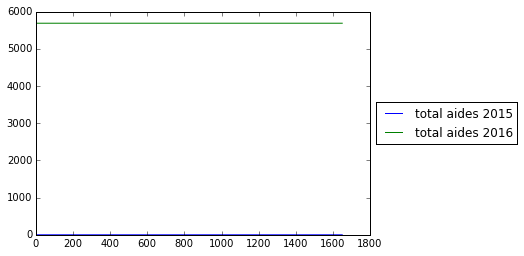

In [44]:
mes_aides(scenario)

Commentaires : 

Fort logiquement, les mêmes problèmes que pour le cas précédent apparaissent ici. Puisqu'il n'y a pas de PPE, qui était la seule aide socio-fiscale susceptible d'apporter une différence entre les deux cas, il n'y a d'ailleurs aucune modification par rapport au cas du concubinage.

### B.3. Couple légalement uni sans enfant dont l’un des deux gagne entre 1 et 2 SMIC et l'autre n'a pas de revenu

Passons au cas où l'un des parents n'a pas de revenu.

In [45]:
scenario2 = create_scenario2(nb_adultes = 2, parent1_25ans = 2, parent2_25ans = 2, union_legale = 2, coeff_smic = 2, indexer =0, test =0)# coeff_smic = 1, nb_enfants = 0, tps_travail = 1)

In [46]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5             0.          15864.43261719 ...,      0.          31713.
      0.        ]
[ 15955.5             0.          15963.48144531 ...,      0.          31911.
      0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 654.8380127   653.31518555  651.79406738 ...,    0.            0.            0.        ]
[ 5612.42333984  5609.63134766  5606.84033203 ...,   812.37182617
   810.01000977   807.56469727]
[ 654.8380127   653.31518555  651.79406738 ...,    0.            0.            0.        ]
[ 5612.42333984  5609.63134766  5606.84033203 ...,   812.37182617
   810.01000977   807.56469727]


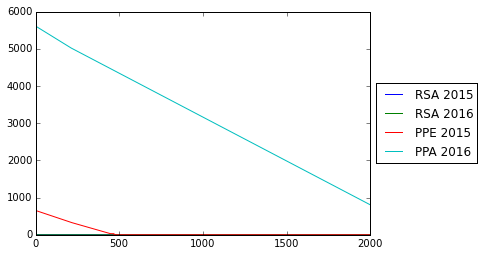

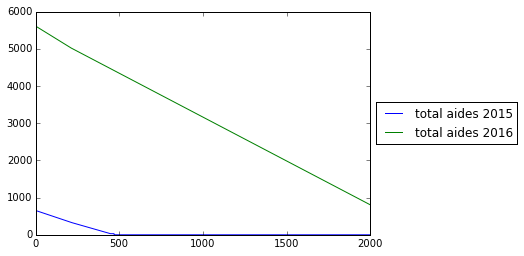

In [47]:
mes_aides2(scenario2)

Commentaires :

Puisque le salaire de l'un des deux parents est ici fixé à zéro, notre fonction parvient à générer un salaire qui évolue entre 1 et 2 SMIC temps plein. Cela confirme que, quelque soit le montant de salaire déclaré dans la "fonction axe", si un salaire non nul est déclaré pour le parent2, le salaire net du parent1 est systématiquement fixé à zéro.

Le niveau de départ de la PPA est similaire à celui des cas précédents, ce qui est rassurant puisqu'il s'agit là encore du point où l'un des membres du couple gagne le SMIC temps plein quand l'autre n'a aucun revenu. Là encore, le niveau des aides est toutefois surévalué. Cette fois-ci, les aides décroissent mais il demeure de la prime d'activité quand le revenu total du foyer est de 2 SMIC temps plein. Ceci nous a surpris et après vérification sur les simulateurs de la CAF, on ne devrait pas trouver de prime d'activité pour ce niveau de revenus dans un couple. 

Nous avons essayé le même scenario en concubinage et observons effectivement une variation de la PPE. Toutefois, puisque le salaire de l'autre parent est alors nul, le concubinage fait légèrement chuter la PPE. C'est une information intéressante mais il serait bien plus riche d'étudier l'évolution de la PPE du couple toute la distribution de revenus au SMIC à temps partiel puisque la somme des deux PPE du couple en concubinage serait rapidement devenue supérieure à celle du couple marié. Encore une fois, se serait de toute façon posée la question de savoir si le calcul de la PPE aurait renvoyé la somme de la PPE de chacun des membres du couple. Ainsi, nous ne présentons pas le cas des concubins dont le deuxième membre du couple n'a pas de revenu puisque l'enseignement est assez limité.

## C. L'effet des enfants à charge

Cette troisième section (C.) est moins essentielle que les deux premières. L'objectif est de vérifier que les mécanismes de majoration liés aux différentes situations familiales ont bien été reproduit dans le passage du RSA et de la PPE à la prime d'activité. Nous étudions les cas du parent isolé avec un enfant (C.1.), du couple avec un (C.2.) et deux (C.3.) enfants à charge.

### C.1. Parent isolé avec un unique enfant

Notre parent travaille à temps plein et nous faisons varier sa rémunération entre 1 et 2 SMIC.

In [48]:
scenario2 = create_scenario2(nb_adultes = 1, parent1_25ans = 1, coeff_smic = 2,  nb_enfants = 1)

In [49]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5             0.          15864.43261719 ...,      0.          31713.
      0.        ]
[ 15955.5             0.          15963.48144531 ...,      0.          31911.
      0.        ]
[ 3611.39770508  3608.62109375  3605.84765625 ...,     0.             0.
     0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 4515.65722656  4512.86425781  4510.07421875 ...,     0.             0.
     0.        ]
[ 3611.39770508  3608.62109375  3605.84765625 ...,     0.             0.
     0.        ]
[ 4515.65722656  4512.86425781  4510.07421875 ...,     0.             0.
     0.        ]


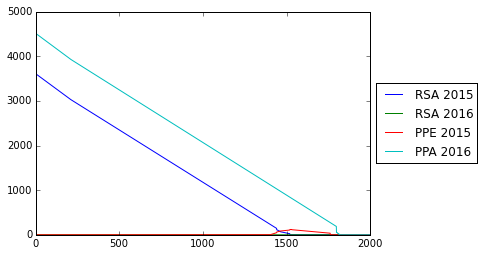

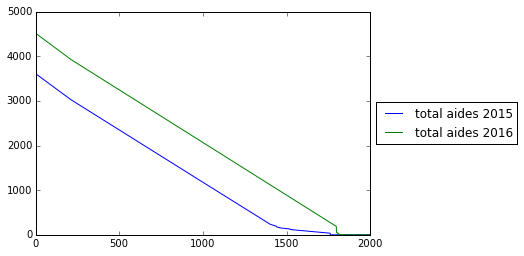

In [50]:
mes_aides2(scenario2) 

Commentaires :

Les niveaux de PPA perçus correspondent assez bien à ceux obtennus à partir du simulateur de la CAF. 
La PPA offre davantage que le RSA combiné à la PPE sur tout l'intervalle de revenus. Absente ici parce qu'effacée par le mécanisme de PPE résiduelle, la PPE ne peut apparaître en théorie que jusqu'à 1,23 SMIC. Or, on obsberve uniquement un sursaut de PPE entre 1,7 SMIC et 1,9 SMIC, ce qui semble être un plafond un peu élevé.

### C.2. Couple avec 1 enfant à charge dont les deux parents gagne entre 1 et 2 SMIC et l'autre n'a pas de revenu

Nous étudions à présent le cas d'un couple avec un enfant dont l'un travaille à temps plein avec une rémunération qui varie entre 1 et 2 SMIC et l'autre qui ne travaille pas.

In [51]:
scenario2 = create_scenario2(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 2, nb_enfants = 1,  union_legale = 1, indexer =1, test =0)

In [52]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5  15856.5      0.  ...,  31713.   31713.       0. ]
[ 15955.5  15955.5      0.  ...,  31911.   31911.       0. ]
[ 6570.46972656  6567.69287109  6564.91943359 ...,  1795.97473145
  1793.73681641  1791.38122559]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 7499.39990234  7496.60791016  7493.81591797 ...,  2699.34814453
  2696.98632812  2694.54125977]
[ 6570.46972656  6567.69287109  6564.91943359 ...,  1795.97473145
  1793.73681641  1791.38122559]
[ 7499.39990234  7496.60791016  7493.81591797 ...,  2699.34814453
  2696.98632812  2694.54125977]


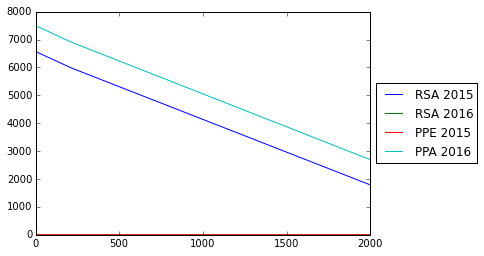

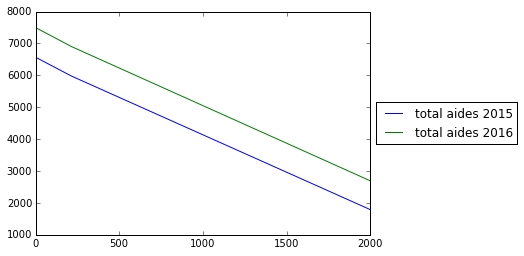

In [53]:
mes_aides(scenario2)

Commentaires : 

En comparant avec B.3., on remarque que l'enfant fait bien augmenter les aides perçues (on ne peut le voir que pour la PPA car il n'y a pas de RSA en B.3. mais le mécanisme est identique).
Les montants de PPA et RSA perçus correspondent plutôt bien aux simulations faites sur le site de la CAF.

### C.3. Couple avec 2 enfants à charge dont l'un des deux parents gagne entre 1 et 2 SMIC et l'autre n'a pas de revenu

Nous réalisons ici le même cas mais avec deux enfants à charge.

In [54]:
scenario2 = create_scenario2(nb_adultes = 2, parent1_25ans = 1, parent2_25ans = 1, coeff_smic = 2, nb_enfants = 2,  union_legale = 1, indexer =1, test =0)

In [55]:
simulation = scenario2.new_simulation()

ordre des variables
1/salaire_year2 2/salaire_year3 3/rsa_year2 4/rsa_year3 5/ppe_year2 6/ppa_year3 7/total_aides_year2 8/total_aides_year3
[ 15856.5  15856.5      0.  ...,  31713.       0.       0. ]
[ 15955.5  15955.5      0.  ...,  31911.       0.       0. ]
[ 6872.89208984  6870.11523438  6867.34179688 ...,  2098.39794922
  2096.16015625  2093.80444336]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 7826.49414062  7823.70166016  7820.90966797 ...,  3026.44482422
  3024.08032227  3021.63769531]
[ 6872.89208984  6870.11523438  6867.34179688 ...,  2098.39794922
  2096.16015625  2093.80444336]
[ 7826.49414062  7823.70166016  7820.90966797 ...,  3026.44482422
  3024.08032227  3021.63769531]


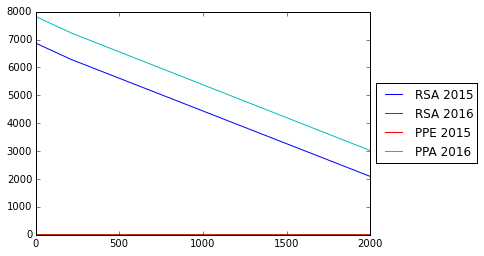

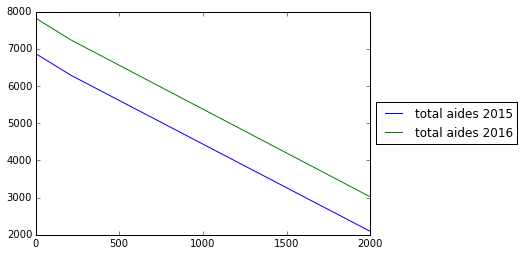

In [56]:
mes_aides(scenario2)

Commentaires : 

Idem que le cas précédent. 

On observe bien la majoration supplémentaire liée au deuxième enfant dans le calcul du RSA et de la PPA. Là encore, les niveaux initiaux de PPA et de RSA sont différents mais les majorations liées aux situations familiales sont identiques pour chacun des deux dispositifs.

# Conclusion

La réforme de la prime d’activité, mise en application à partir de janvier 2016, a fait évoluer les conditions d’éligibilité et le niveau des aides de soutien aux revenus modestes par rapport au dispositif précédant qui combinait Revenu de Solidarité Active et Prime pour l’Emploi. L’objectif du présent rapport était d’identifier les gagnants et les perdants de cette réforme à travers neuf cas types. 


Ainsi, nous avons pu observer que les jeunes comptaient parmi les grands gagnants de la réforme. Toutefois, alors qu'ils touchaient automatiquement un niveau plus faible de PPE jusqu'en 2015, ils doivent à présent faire la démarche de demander la prime d'activité auprès de la CAF de leur département. Un certain nombre de leurs aînés, qui avaient droit au RSA, n'y recouraient pas. Le fait de bien séparer la prime d'activité du RSA socle, minima social, brisera peut-être quelques barrières psychologiques, favorisant ainsi le recours. Mais quoi qu'il en soit, il n'existe plus de soutien automatique aux revenus modestes suite à la réforme. Par ailleurs, nous avons aussi pu vérifier que les mécanismes de majoration dépendants des situations familiales utilisés pour la prime d'activité sont identiques à ceux qui fonctionnaient pour le RSA activité.


Malheureusement, nous avons rencontré plusieurs problèmes techniques liés à l'utilisation d'openfisca au cours de notre étude, qui nous empêchent de présenter des conclusions à la hauteur de nos objectifs, notamment en termes de magnitude des effets de la réforme. A défaut, nous allons reprendre ici les principales difficultés rencontrées, et que nous ne sommes pas parvenus à résoudre.


En premier lieu, nous n'avons pas réussi à obtenir à la fois l'évolution du salaire de l'un des membres du couple et un salaire non nul pour l'autre. Cela n'apparaît pas dans nos cas-types mais notre fonction nous permettait aussi de faire évoluer ensemble les salaires des deux membres du couple mais là encore, l'un des deux salaires nets était fixé à zéro. Alors que le niveau de salaire_de_base est cohérent avec nos scénarii, le salaire net est dissocié du salaire_de_base.Dès lors, nous ne sommes pas réllement parvenus à obtenir des résultats probants pour l'influence du statut légal du couple sur les aides. Nous attendions pourtant des résultats intéressants du fait de la coexistence de deux niveaux de calcul jusqu'en 2015, le foyer au sens de la CAF pour le RSA et le foyer fiscal pour la PPE, la prime d'activité s'étant calée sur le foyer au sens de la CAF.

Par ailleurs, un autre problème lié au niveau de salaire net apparaît. En ne comptant surprenamment qu’un faible nombre d’heures travaillées pour les individus à temps partiel alors que nous essayons de déclarer une évolution calée sur la rémunération, notre fonction leur attribut un salaire_net négatif qui biaise ensuite le calcul du montant d’aide perçu. 

Enfin, la comparaison des résultats de nos simulations avec ceux des simulateurs en ligne des organismes publics, notamment celui de la CAF, nous a fait constater des montants de PPA qui nous semblent surévalués. 

Malgré nos nombreuses tentatives pour résoudre l'ensemble de ces problèmes, nous n’y sommes pas parvenus. Dès lors, l'ambition du rapport quant à ses résultats est plus réduite mais il constitue une excellente entrée en matière dans openfisca et la complexité du système socio-fiscal français.